___________
# Python Code Version 3.0 for
# Climate Mathematics: Theory and Applications - Chapter 2
_____________

<b> Samuel S.P. Shen and Richard C.J. Somerville
____________

This Version 3.0 is authored by Briana Ramirez, edited by Samuel Shen. Liu Yang, Sandra Villamar, and Joaquin Stawsky contributed codes to this version.

Video tutorial for the python code can be found at the following URL:
https://www.youtube.com/channel/UC7D9i0kBMzPTHyEhU0h6W9g

This version is based upon the previous version described in the following box.

In [1]:
######################################################################################################################
#This Python Code for Climate Science is written for the book entitled "Climate Mathematics: Theory and Applications"#
#A Cambridge University Press book authored by SSP Shen and RCJ Somerville in July 2019                              #
#The Python codes were based on the R codes written by Samuel Shen Distinguished Professor,                          #
#San Diego State University, USA and were translated from R by Louis Selstad, Stephen Shen,                          #
#Gregori Clarke, and Dakota Newmann and edited by Samuel Shen.                                                       #
######################################################################################################################

In [2]:
#FIRST TIME Python users*****
#These package need to be installed (on the terminal or anaconda interface) before importing them below. 

#Follow this tutorial for package installation before
# https://towardsdatascience.com/importerror-no-module-named-xyz-45e4a5339e1b

In [3]:
#Change your file path to the folder where your downloaded data is stored
#MAC HELP: https://support.apple.com/guide/mac-help/go-directly-to-a-specific-folder-on-mac-mchlp1236/mac
#PC HELP: https://www.sony.com/electronics/support/articles/00015251
import os
# os.chdir("/Users/sshen/climmath/data")
os.chdir('/Users/HP/Documents/sshen/climmath/data')

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
#Style Dictionary to standardize plotting scheme between different python scripts 
import matplotlib.pyplot as plt

styledict = {'xtick.labelsize':20,
             'xtick.major.size':9,
             'xtick.major.width':1,
             'ytick.labelsize':20,
             'ytick.major.size':9,
             'ytick.major.width':1,
             'legend.framealpha':0.0,
             'legend.fontsize':15,
             'axes.labelsize':20,
             'axes.titlesize':25,
             'axes.linewidth':2,
             'figure.figsize':(12,8),
             'savefig.format':'jpg'}
plt.rcParams.update(**styledict)

In [6]:
#Function that creates personalized discrete Colormap
import numpy as np 
from matplotlib import cm as cm1
from matplotlib.colors import ListedColormap, to_rgba

def newColMap(colors):
    """
    This function creates a new color map from a list of colors given
    as a parameter. Recommended length of list of colors is at least 6.
    """
    first = np.repeat([to_rgba(colors[0])], 2, axis = 0)
    last = np.repeat([to_rgba(colors[-1])], 2, axis = 0)
    v = cm1.get_cmap('viridis', 16*(len(colors)-2))
    newcolors = v(np.linspace(0, 1, 16*(len(colors)-2)))
    for (i, col) in enumerate(colors[1:-1]):
        newcolors[16*i : 16*(i+1), :] = to_rgba(col)
    return ListedColormap(np.append(np.append(first,newcolors, axis=0), last, axis=0))


__________________
# Chapter 2: Basics of Python Programming
__________________

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
import matplotlib.mlab as mlab
import pandas as pd

from cartopy import crs, mpl
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from mpl_toolkits.basemap import Basemap
# Having an issue with the import “mpl_toolkits.basemap” package? 
# Unlike other package installations, this package requires additional steps to install. 
#    1.Download basemap package from this website
#      https://www.lfd.uci.edu/~gohlke/pythonlibs/#basemap
#          *Note the package version needs to be the same as Python version
#    2.Run the following line in your terminal
#      pip install basemap-1.2.2-cp37-cp37m-win_amd64.whl

from mpl_toolkits import mplot3d
import netCDF4
from netCDF4 import Dataset as ds
from urllib import request
import scipy as sp
from scipy import stats as stt
from sklearn import datasets, linear_model
from sklearn.neighbors import KernelDensity as kd
from sklearn.linear_model import LinearRegression
from random import randint
from scipy.stats import norm
import statsmodels
import sklearn
import math
import statistics
import sympy as sy
from sympy import symbols, diff
import statsmodels.api as sm
from datetime import date

# 2.2: Python Tutorial

<b> Python As a Smart Calculator

In [8]:
# Basic arithmetic 
1+4

5

In [9]:
# Basic arithmetic 
2 + np.pi/4 - 0.8

1.9853981633974482

In [10]:
# Variable Assignment
x = -1
y = 2
z = 4

# x**y means x^y: x to the power of y
t = 2*x**y-z  
t

-2

In [11]:
# Variable Assignment
u = 2
v = 3
u+v

5

In [12]:
# np.sin is the sine function in Python
np.sin(u*v)  

-0.27941549819892586

<b> Define a Sequence in Python 

In [13]:
# Enter the temperature data
tmax = [77,72,75,73,66,64,59] 

# Show the temperature data
tmax 

[77, 72, 75, 73, 66, 64, 59]

In [14]:
# A Python sequence starts from 0 while R starts from 1
np.arange(9) 
# A sequence is called an array in Python 

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [15]:
# np.arange(x,y) creates an array of numbers incremented by 1 between integer x and integer (y-1)
np.arange(1, 9) 

array([1, 2, 3, 4, 5, 6, 7, 8])

In [16]:
# np.arange(x,y) can take negative and real numbers with a default increment of 1
np.arange(-5.5, 2) 

array([-5.5, -4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5])

<b>Define a Function in Python

In [17]:
# Define the x^2 function and call it samfctn(x)
def samfctn(x):
    return x * x
samfctn(4)

16

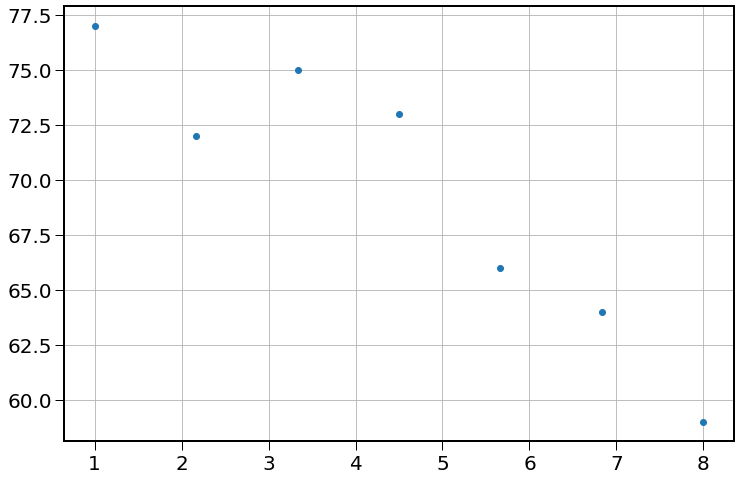

In [18]:
#Fig 2.3
x = np.linspace(1,8,7)
tmax = [77,72,75,73,66,64,59] 

plt.plot(x, tmax, "o")
plt.grid()

In [19]:
# Define a multivariate function "x+y-z/2" 
def fctn2(x, y, z):
    return x + y - z / 2;
fctn2(1, 2, 3)

1.5

<b>Plot with Python

Plot the curve of y = sin(x) from -pi to 2*pi

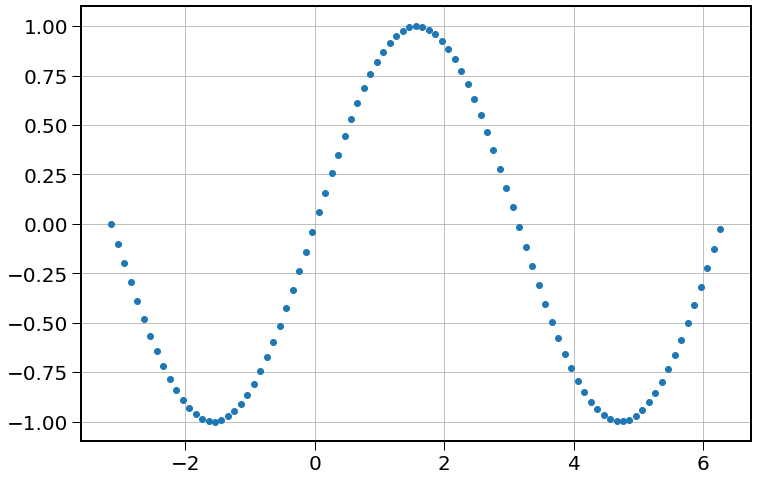

In [20]:
# math.pi is the same as np.pi and scipy.pi, just using different packages
t = np.arange(-math.pi, 2*math.pi, 0.1) 
plt.plot(t, np.sin(t), "o")
plt.grid()
plt.show()

Plot x-y data based on a formula

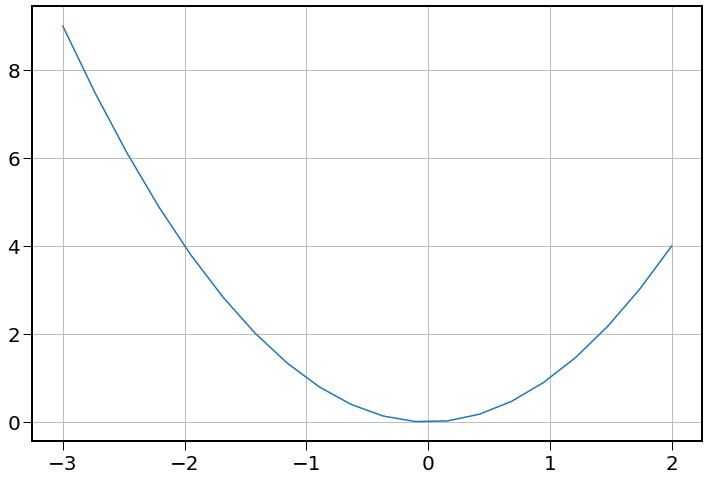

In [21]:
# Uniform division using 20 points
t = np.linspace(-3, 2, 20) 
plt.plot(t, t ** 2) 
plt.grid()
plt.show()

Plot 3D Surface

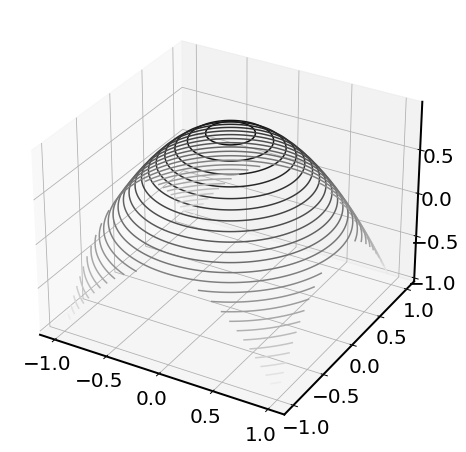

In [22]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

# Defines a formula for Z
def f(x, y):
    return 1 - x**2 - y**2
 
X, Y = np.meshgrid(x, y)

# Renders z function on the x, y grid
Z = f(X, Y) 

# Creates the 3D plot
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.contour3D(X, Y, Z, 30, cmap = 'binary')
plt.show()

Contour Plot

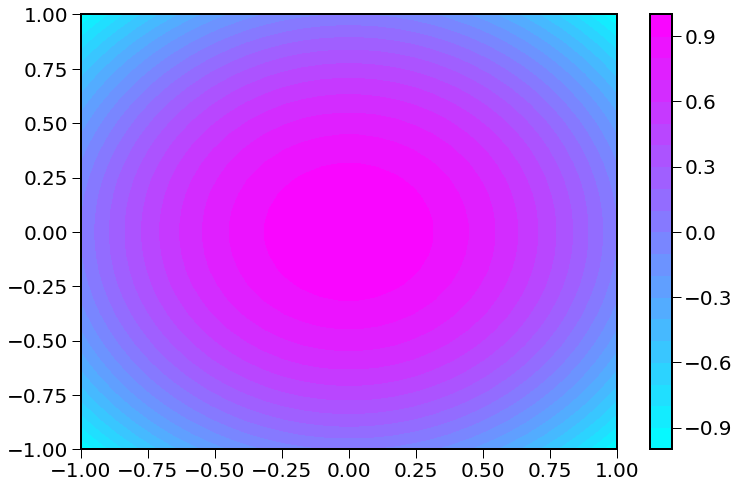

In [23]:
#Fig 2.4
x = np.linspace(-1, 1, 30)
y = np.linspace(-1, 1, 30)
 
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Creates and colors the contour plot
plt.contourf(X, Y, Z, 20, cmap = 'cool') #cmap='color-scheme'

# Adds colorbar for color map of contours
plt.colorbar()
plt.show()

Plot 3D Contour Plot

<ipython-input-24-723a2fbd47ff>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_zticklabels([-1,-.75,-.5,-.25,0,.25,.5,.75,1],Fontsize=14)
<ipython-input-24-723a2fbd47ff>:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_zticklabels([-1,-.75,-.5,-.25,0,.25,.5,.75,1],Fontsize=14)


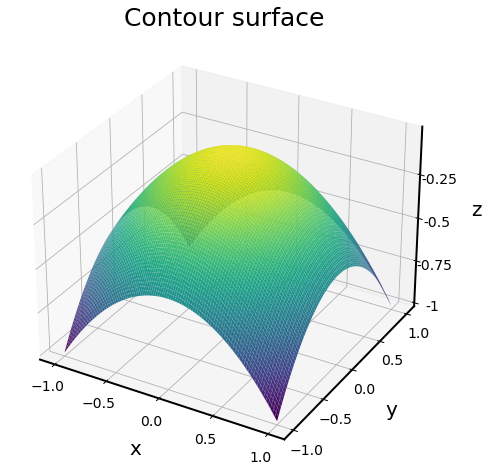

In [24]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

# Defines a formula for Z
def f(x, y):
    return 1 - x**2 - y**2
 
X, Y = np.meshgrid(x, y)

# Renders z function on the x, y grid
Z = f(X, Y)

# Creates the 3D plot
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none') #cmap = 'color'

# Labels the plot
ax.set_title('Contour surface')
ax.set_xlabel('x', labelpad=15)
plt.xticks(fontsize=14)
ax.set_ylabel('y', labelpad=15)
plt.yticks(fontsize=14)
ax.set_zlabel('z', labelpad=15)
ax.set_zticklabels([-1,-.75,-.5,-.25,0,.25,.5,.75,1],Fontsize=14)
ax.view_init(30)
plt.show()

<b> Symbolic Calculations with Python

In [25]:
# Makes 'x' and 'y' symbols used for derivatives
x = symbols('x')
y = symbols('y')
# 'diff' command takes the derivative of x^2 w.r.t. x
diff(x ** 2, x)

2*x

In [26]:
# Creates a function of x^2 
fx = x ** 2

# Takes the derivative of function w.r.t. x
rslt = diff(fx, x)
print('The derivative of the function fx w.r.t. x is: ', rslt)

The derivative of the function fx w.r.t. x is:  2*x


In [27]:
# Creates a function of x^2 * sin(x)
fx = (x ** 2) * sy.sin(x)

# Take the derivative of the function w.r.t. x
rslt = diff(fx, x)
print('The derivative of the function w.r.t. x is: ', rslt)

The derivative of the function w.r.t. x is:  x**2*cos(x) + 2*x*sin(x)


In [28]:
# Create a multivariate function: x^2+y^2 
fxy = x ** 2 + y ** 2

# Take partial derivative of function w.r.t. x
rslt_x = diff(fxy, x)

# Take partial derivative of function w.r.t. y
rslt_y = diff(fxy, y)
print('The partial derivative of the function w.r.t. x is: ', rslt_x)
print('The partial derivative of the function w.r.t. y is: ', rslt_y)

The partial derivative of the function w.r.t. x is:  2*x
The partial derivative of the function w.r.t. y is:  2*y


In [29]:
# Integrates x^2 from 0 to 1
sy.integrate(x ** 2, (x, 0, 1))

1/3

In [30]:
# Integrates cos(x) from 0 to pi/2
sy.integrate(sy.cos(x), (x, 0, math.pi / 2))

1.00000000000000

<b> Vectors and Matrices 

In [31]:
# Creates a 5X1 matrix
np.mat([[1], [6], [3], [np.pi], [-3]])

matrix([[ 1.        ],
        [ 6.        ],
        [ 3.        ],
        [ 3.14159265],
        [-3.        ]])

In [32]:
# Creates a sequence from 2 to 6
np.arange(2, 7)

array([2, 3, 4, 5, 6])

In [33]:
# Creates a sequence incremented by 2 from 1 to 10 
np.arange(1, 10, 2)

array([1, 3, 5, 7, 9])

In [34]:
# Creates a 4X1 matrix
x = np.mat([[1], [-1], [1], [-1]])

# Adds number 1 to each element of x
print(x + 1)

[[2]
 [0]
 [2]
 [0]]


In [35]:
# Multiplies number 2 to each element of x
print(x * 2)

[[ 2]
 [-2]
 [ 2]
 [-2]]


In [36]:
# Divides each element of x by 2
print(x / 2)

[[ 0.5]
 [-0.5]
 [ 0.5]
 [-0.5]]


In [37]:
# Creates a 1X4 vector with a sequence incremented by 1 from 1 to 4
y = np.mat(np.arange(1, 5))
# Computes element-wise multiplication and results in a 4X1 vector
np.multiply(x, y.T)

matrix([[ 1],
        [-2],
        [ 3],
        [-4]])

In [38]:
# Dot product and results in 1X1 matrix
np.dot(x.T, y.T)

matrix([[-2]])

In [39]:
# Transforms x into a row 1X4 vector
x.T

matrix([[ 1, -1,  1, -1]])

In [40]:
#The dot product of two vectors  
np.dot(y, x)

matrix([[-2]])

In [41]:
# This column-times-row yields a 4X4 matrix
# Note: For detailed difference between np.multiply and np.dot visit the following URL:
#    https://www.geeksforgeeks.org/difference-between-numpy-dot-and-operation-in-python/

np.matmul(x, y)

matrix([[ 1,  2,  3,  4],
        [-1, -2, -3, -4],
        [ 1,  2,  3,  4],
        [-1, -2, -3, -4]])

In [42]:
# Convert a vector into a matrix of the same number of elements
# y.reshape() splits the elements in the vector by rows
# y.reshape().transpose() splits in order of columns
my = y.reshape(2, 2).transpose()
print(my)

[[1 3]
 [2 4]]


In [43]:
# Finds dimensions of a matrix
my.shape

(2, 2)

In [44]:
# Converts a matrix to a vector, via row-major order
my.flatten()

matrix([[1, 3, 2, 4]])

In [45]:
# Reshapes x to a 2X2 matrix
mx = x.reshape(2, -1).transpose()
# Multiplication between each pair of elements
np.multiply(mx, my)

matrix([[ 1,  3],
        [-2, -4]])

In [46]:
# Division between each pair of elements
np.divide(mx, my)

matrix([[ 1.        ,  0.33333333],
        [-0.5       , -0.25      ]])

In [47]:
# Subtract 2 times a matrix from another
np.subtract(mx, 2 * my)

matrix([[-1, -5],
        [-5, -9]])

In [48]:
# This is matrix multiplication in linear algebra
np.matmul(mx, my)

matrix([[ 3,  7],
        [-3, -7]])

In [49]:
# Determinant of a matrix
x = np.linalg.det(my)
print(x)

-2.0


In [50]:
# Inverse of a matrix
z = np.linalg.inv(my)
print(z)

[[-2.   1.5]
 [ 1.  -0.5]]


In [51]:
#Verifies that the inverse of the matrix is correct by multiplying 
# the original matrix and the inverse matrix
# Note: np.multiply is element-wise multiplication and np.matmul is matrix multiplication
a = np.matmul(z, my)
print(a)

[[1. 0.]
 [0. 1.]]


In [52]:
# Returns a left-to-right diagonal vector of a matrix
np.diagonal(my)

array([1, 4])

In [53]:
# Returns the eigenvalues AND eigenvectors of the "my" matrix
myeigvect = np.linalg.eig(my)
print(myeigvect)

(array([-0.37228132,  5.37228132]), matrix([[-0.90937671, -0.56576746],
        [ 0.41597356, -0.82456484]]))


In [54]:
# Returns the singular value decomposition (SVD) of the "my" matrix
mysvd = np.linalg.svd(my)
print(mysvd)

(matrix([[-0.57604844, -0.81741556],
        [-0.81741556,  0.57604844]]), array([5.4649857 , 0.36596619]), matrix([[-0.40455358, -0.9145143 ],
        [ 0.9145143 , -0.40455358]]))


In [55]:
# Returns a solved linear matrix equation of the "my" matrix and array [1,3]
ysolve = np.linalg.solve(my, [1,3])
print(ysolve)

[ 2.5 -0.5]


In [56]:
# Verifies the solution is correct by multiplying the "my" matrix with "ysolve" 
n = np.matmul(my, ysolve)
print(n)

[[1. 3.]]


<b> Simple Statistics with Python

In [57]:
# Generates 10 normally distributed numbers of N(0,1^2)
random = np.random.normal(0, 1, 10)
print(random)

[ 0.21201877  0.76441407  0.76234511 -0.57272545 -1.77034725  1.10311978
  0.59926247 -0.26965809 -0.45409029  1.45557261]


In [58]:
# Returns the mean of that random sample
mean = np.mean(random)
print(mean)

0.18299117346932875


In [59]:
# Returns the variance of that random sample
var = np.var(random)
print(var)

0.8311330877032501


In [60]:
# Returns the standard deviation of that random sample
std = np.std(random)
print(std)

0.9116650084890009


In [61]:
# Returns the median of that random sample
median = np.median(random)
print(median)

0.40564061986896965


In [62]:
# Returns quantile values in [0, 0.25, 0.5, 0.75, 1]
# quantile = pd.DataFrame(random).quantile([0, 0.25, 0.5, 0.75, 1]) # another way
quantile = np.quantile(random, [0, 0.25, 0.5, 0.75, 1])
print(quantile)

[-1.77034725 -0.40798224  0.40564062  0.76389683  1.45557261]


In [63]:
# Returns range of values (max - min) in random sample
rang = np.ptp(random)
print(rang)

3.2259198550918162


In [64]:
# Returns the min value in random sample
minimum = np.min(random)
print(minimum)

# Returns the max value in random sample
maximum = np.max(random)
print(maximum)

-1.7703472489949492
1.455572606096867


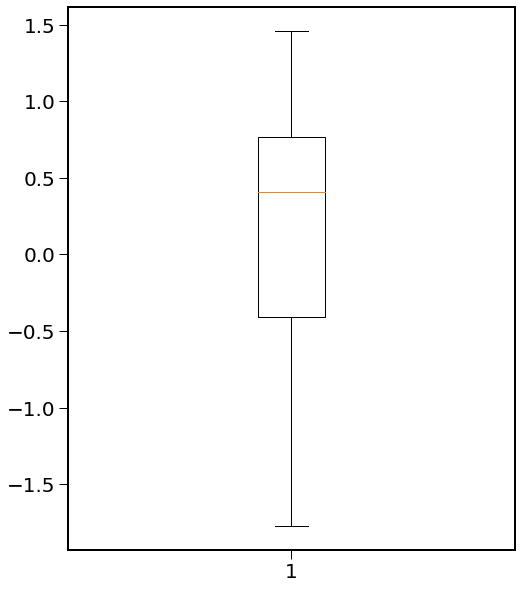

In [65]:
# Yields the box plot of random values
fig = plt.figure(1, figsize=(8, 10))
ax = fig.add_subplot(111)
bp = ax.boxplot(random)
plt.show()

In [66]:
# Yields statistical summary of the data sequence
random = np.random.normal(0, 1, 12)
summ = pd.DataFrame(random).describe()
print(summ)

               0
count  12.000000
mean    0.107452
std     1.083549
min    -1.202727
25%    -0.932029
50%     0.150494
75%     1.122441
max     1.931143


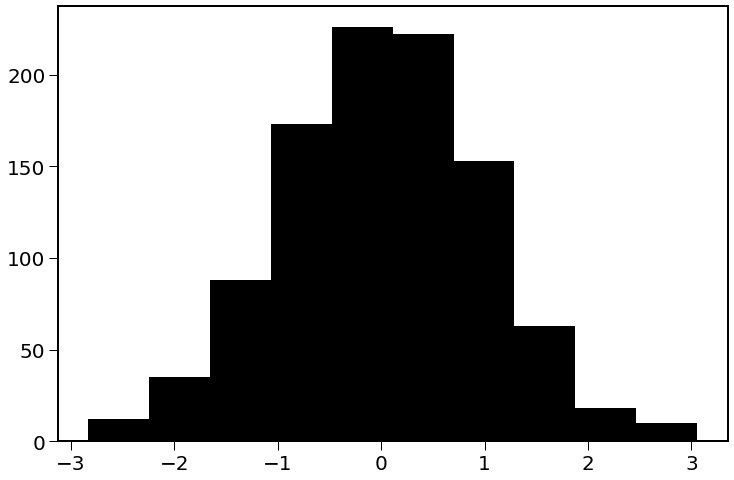

In [67]:
# Yields the histogram of 1000 random numbers with a normal distribution
w = np.random.normal(0, 1, 1000)
hist = plt.hist(w, facecolor='black')
plt.show()

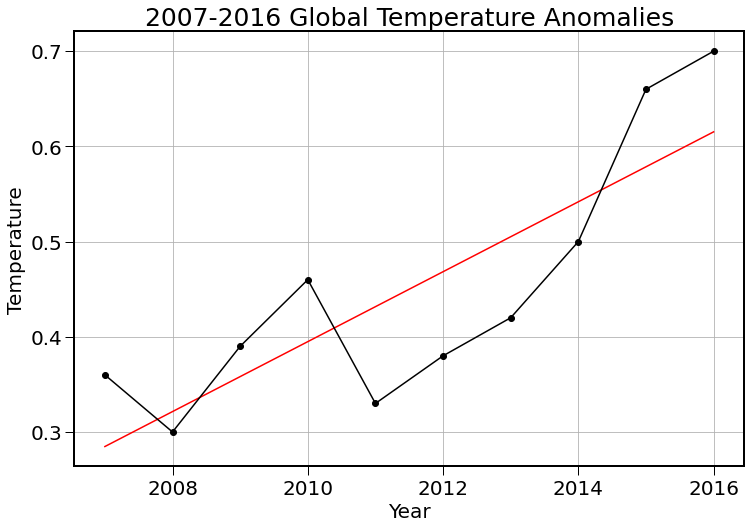

In [68]:
#Fig 2.5
# Linear Regression and linear trend line
# 2007-2016 data of global temperature anomalies
# Source: NOAAGlobalTemp data
from sklearn.linear_model import LinearRegression

t = np.linspace(2007, 2016, 10)
T = [.36,.3,.39,.46,.33,.38,.42,.5,.66,.7]
lm = LinearRegression()
lm.fit(t.reshape(-1,1), T)
predictions = lm.predict(t.reshape(-1, 1))

plt.plot(t, predictions, '-r')
plt.plot(t,T,"-o", color="black")
plt.title("2007-2016 Global Temperature Anomalies")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.grid()
plt.show()  

<b> Input Data by reading a file

In [69]:
# CSV file 
file = "NOAAGlobalT.csv"
data = pd.read_csv(file)

In [70]:
# TXT file 
file = 'http://shen.sdsu.edu/data/' + 'aravg.mon.land_ocean.90S.90N.v4.0.1.201703.asc.txt'
data = pd.read_table(file, header = None, delim_whitespace = True)

In [71]:
# ASC file 
file = open('NOAAGlobalTemp.gridded.v4.0.1.201701.asc', "r")
# read float numbers from the file
data = []
for line in file:
    x = line.strip().split()
    for f in x:
        data.append(float(f))

In [72]:
# NetCDF file 
file = "air.mon.mean.nc"
data = ds(file,"r+")